
# MIE1624 - Assignment 2 - bonus
## KERAS - NN
## Bibin K. Sebastian
## 1003752691

In [1]:
#Import necessary libraries 
import keras
import keras.backend as K
from keras.callbacks import ModelCheckpoint,TensorBoard,History
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

from sklearn.metrics import r2_score

/Users/bibinsebastian/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
dataset = pd.read_csv("dataset.csv") # read the dataset which was saved up from initial section
dataset.pop('Unnamed: 0');

In [3]:
y = dataset.pop('Q9'); # separate the target variable

#### defining a function to find the unbiased fit estimator Adjusted $R^2$

In [4]:
def adjusted_r2(y_true,y_pred,data):
    r2 = r2_score(y_true,y_pred)
    return(1 - (1-r2)*(data.shape[0]-1)/(data.shape[0]-data.shape[1]-1))

In [5]:
# change the features to categorical 
dataset.Q23 = dataset.Q23.astype('category')
dataset.Q24 = dataset.Q23.astype('category')
dataset.Q25 = dataset.Q25.astype('category')
dataset.Q26 = dataset.Q26.astype('category')

*** One hot encoding to ensure that the columns with multiple categories are separated in different columns. I am using pandas get_dummies function to encode the dataframe (will encode only object or categorical type columns). While doing so , to ensure that we get rid of the dummy variable trap, drop_first parameter needs to be set as True.This step will produce k-l features from a column with k categories . ***

In [6]:
dataset.shape

(6337, 18)

In [7]:
dataset.dtypes.value_counts()

object      14
category     2
category     1
category     1
dtype: int64

In [8]:
dataset = pd.get_dummies(dataset,drop_first=True)

In [9]:
dataset.shape # looks like get_dummies did its work!!

(6337, 213)

In [10]:
len(dataset.columns)

213

In [11]:
dataset.head() # nice and easy 

,Q1_Male,Q1_Prefer not to say,Q1_Prefer to self-describe,Q2_22-24,Q2_25-29,Q2_30-34,Q2_35-39,Q2_40-44,Q2_45-49,Q2_50-54,...,Q25_4,Q25_5,Q25_6,Q25_7,Q25_8,Q25_9,Q26_2,Q26_4,Q26_5,Q26_6
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
# Train test spliting with test set of 20%
X_train, X_test, y_train , y_test = train_test_split(dataset.values,y, test_size=0.2, random_state=99)

In [13]:
X_train.shape # we have more than 5000 points for training 

(5069, 213)

In [14]:
LReLU = LeakyReLU(alpha=0.3) 
# I wanted to check if some of the neurons weight becomes zero or not . Leaky RelU does a good job at that 

Using Keras as a higer level wrapper on Tensor flow makes it quite easy to implement Neural network models . I would start off with a simple model with 2 hidden layers . Using mean ab

## testing with different number of hidden layers
###  I will be keeping the number of epochs as 10 so that we can compare them 

In [15]:
# Train test spliting with test set of 20%
X_train, X_test, y_train , y_test = train_test_split(dataset.values,y, test_size=0.2, random_state=99)

In [16]:

Model = Sequential()

# Input Layer :
Model.add(Dense(32, input_dim = X_train.shape[1], activation='relu'))

# Hidden Layers :
Model.add(Dense(64, activation='relu'))
Model.add(Dense(128, activation='relu'))
#Model.add(Dense(256, activation='relu'))
#Model.add(Dense(256, activation='relu'))
# Output Layer :
Model.add(Dense(1,activation='linear'))

# Compile the network :
Model.compile(loss='mean_squared_error', optimizer='adam')
#Model.optimizer.lr.assign(value=0.001)
Model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                6848      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


In [18]:
hist = Model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.1)

Train on 4562 samples, validate on 507 samples
Epoch 1/10
4562/4562 [==============================] - 3s 756us/step - loss: 5595675223.9895 - val_loss: 4820694307.8501
Epoch 2/10
4562/4562 [==============================] - 2s 391us/step - loss: 3472946401.8097 - val_loss: 2841229518.5168
Epoch 3/10
4562/4562 [==============================] - 2s 427us/step - loss: 2699691051.8825 - val_loss: 2627995587.6607
Epoch 4/10
4562/4562 [==============================] - 2s 384us/step - loss: 2449858416.5121 - val_loss: 2394623048.9625
Epoch 5/10
4562/4562 [==============================] - 2s 358us/step - loss: 2184442754.5252 - val_loss: 2148772467.8817
Epoch 6/10
4562/4562 [==============================] - 2s 338us/step - loss: 1908343519.0039 - val_loss: 1886049246.4221
Epoch 7/10
4562/4562 [==============================] - 2s 349us/step - loss: 1672852523.0408 - val_loss: 1701819225.7515
Epoch 8/10
4562/4562 [==============================] - 2s 446us/step - loss: 1506809711.1092 - val

In [19]:
pred = Model.predict(X_train)

In [20]:
r2 = r2_score(y_true=y_train, y_pred=pred)
r2

0.5726124817678916

In [21]:
adjusted_r2(y_train,pred,X_train)

0.5538620098042584

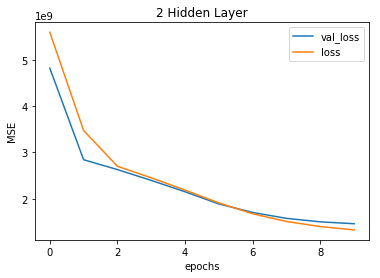

In [22]:
pd.DataFrame(hist.history).plot()
plt.title("2 Hidden Layer")
plt.xlabel("epochs")
plt.ylabel("MSE")

# Model 2 

In [23]:
# Train test spliting with test set of 20%
X_train, X_test, y_train , y_test = train_test_split(dataset.values,y, test_size=0.2, random_state=99)


Model = Sequential()

# Input Layer :
Model.add(Dense(32, input_dim = X_train.shape[1], activation='relu'))

# Hidden Layers :
Model.add(Dense(64, activation='relu'))
Model.add(Dense(128, activation='relu'))
Model.add(Dense(128, activation='relu'))
#Model.add(Dense(256, activation='relu'))
# Output Layer :
Model.add(Dense(1,activation='linear'))

# Compile the network :
Model.compile(loss='mean_squared_error', optimizer='adam')
#Model.optimizer.lr.assign(value=0.001)
Model.summary()

hist = Model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.1)

pred = Model.predict(X_train)

r2 = r2_score(y_true=y_train, y_pred=pred)
print('R2_score',r2)

print('AdjustedR2_score',adjusted_r2(y_train,pred,X_train))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                6848      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 33,921
Trainable params: 33,921
Non-trainable params: 0
_________________________________________________________________
Train on 4562 samples, validate on 507 samples
Epoch 1/10
4562/4562 [==============================] - 5s 1ms/step - loss: 4756178726.2709

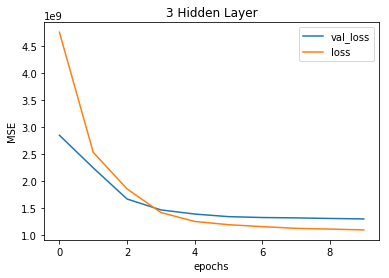

In [24]:
pd.DataFrame(hist.history).plot()
plt.title("3 Hidden Layer")
plt.xlabel("epochs")
plt.ylabel("MSE")

# Discussion on the number of hidden layers

### As the number of hidden layer increases the expressiveness off the neural network goes up. We could see that the neural network starts to over fit much earlier . with 2 layers we had to go till 6 epoch where as the second model overfits after 3rd epoch

# Number of nodes per layer

## Model 1 - 

In [25]:
# Train test spliting with test set of 20%
X_train, X_test, y_train , y_test = train_test_split(dataset.values,y, test_size=0.2, random_state=99)


Model = Sequential()

# Input Layer :
Model.add(Dense(32, input_dim = X_train.shape[1], activation='relu'))

# Hidden Layers :
Model.add(Dense(64, activation='relu'))
Model.add(Dense(64, activation='relu'))
#Model.add(Dense(128, activation='relu'))
#Model.add(Dense(256, activation='relu'))
# Output Layer :
Model.add(Dense(1,activation='linear'))

# Compile the network :
Model.compile(loss='mean_squared_error', optimizer='adam')
#Model.optimizer.lr.assign(value=0.001)
Model.summary()

hist = Model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.1)

pred = Model.predict(X_train)

r2 = r2_score(y_true=y_train, y_pred=pred)
print('R2_score',r2)

print('AdjustedR2_score',adjusted_r2(y_train,pred,X_train))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                6848      
_________________________________________________________________
dense_11 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 13,185
Trainable params: 13,185
Non-trainable params: 0
_________________________________________________________________
Train on 4562 samples, validate on 507 samples
Epoch 1/10
4562/4562 [==============================] - 3s 587us/step - loss: 5665582598.5094 - val_loss: 5198912823.5424
Epoch 2/10
4562/4562 [==============================] - 1s 288us/step - loss: 4047974925.5800 - val_l

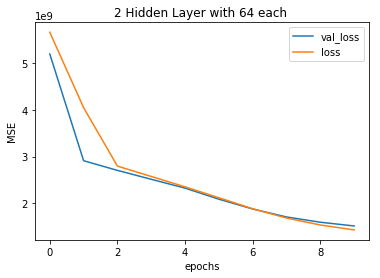

In [26]:
pd.DataFrame(hist.history).plot()
plt.title("2 Hidden Layer with 64 each ")
plt.xlabel("epochs")
plt.ylabel("MSE")

## Model 2 

In [27]:
# Train test spliting with test set of 20%
X_train, X_test, y_train , y_test = train_test_split(dataset.values,y, test_size=0.2, random_state=99)


Model = Sequential()

# Input Layer :
Model.add(Dense(32, input_dim = X_train.shape[1], activation='relu'))

# Hidden Layers :
Model.add(Dense(128, activation='relu'))
Model.add(Dense(128, activation='relu'))
#Model.add(Dense(128, activation='relu'))
#Model.add(Dense(256, activation='relu'))
# Output Layer :
Model.add(Dense(1,activation='linear'))

# Compile the network :
Model.compile(loss='mean_squared_error', optimizer='adam')
#Model.optimizer.lr.assign(value=0.001)
Model.summary()


hist = Model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.1)

pred = Model.predict(X_train)

r2 = r2_score(y_true=y_train, y_pred=pred)
print('R2_score',r2)

print('AdjustedR2_score',adjusted_r2(y_train,pred,X_train))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 32)                6848      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 129       
Total params: 27,713
Trainable params: 27,713
Non-trainable params: 0
_________________________________________________________________
Train on 4562 samples, validate on 507 samples
Epoch 1/10
4562/4562 [==============================] - 4s 949us/step - loss: 5475615144.9084 - val_loss: 4216013611.4241
Epoch 2/10
4562/4562 [==============================] - 2s 507us/step - loss: 3104383840.4068 - val_l

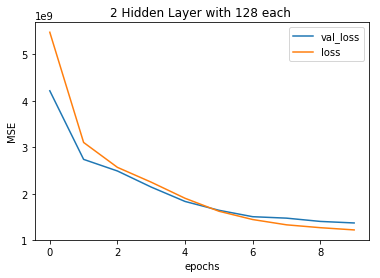

In [28]:
pd.DataFrame(hist.history).plot()
plt.title("2 Hidden Layer with 128 each ")
plt.xlabel("epochs")
plt.ylabel("MSE")

# Model 3 

In [29]:
# Train test spliting with test set of 20%
X_train, X_test, y_train , y_test = train_test_split(dataset.values,y, test_size=0.2, random_state=99)


Model = Sequential()

# Input Layer :
Model.add(Dense(32, input_dim = X_train.shape[1], activation='relu'))

# Hidden Layers :
Model.add(Dense(256, activation='relu'))
Model.add(Dense(256, activation='relu'))
#Model.add(Dense(128, activation='relu'))
#Model.add(Dense(256, activation='relu'))
# Output Layer :
Model.add(Dense(1,activation='linear'))

# Compile the network :
Model.compile(loss='mean_squared_error', optimizer='adam')
#Model.optimizer.lr.assign(value=0.001)
Model.summary()

hist = Model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.1)

pred = Model.predict(X_train)

r2 = r2_score(y_true=y_train, y_pred=pred)
print('R2_score',r2)

print('AdjustedR2_score',adjusted_r2(y_train,pred,X_train))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 32)                6848      
_________________________________________________________________
dense_19 (Dense)             (None, 256)               8448      
_________________________________________________________________
dense_20 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 257       
Total params: 81,345
Trainable params: 81,345
Non-trainable params: 0
_________________________________________________________________
Train on 4562 samples, validate on 507 samples
Epoch 1/10
4562/4562 [==============================] - 6s 1ms/step - loss: 4998448533.3240 - val_loss: 2935510756.2288
Epoch 2/10
4562/4562 [==============================] - 4s 827us/step - loss: 2709493886.1762 - val_los

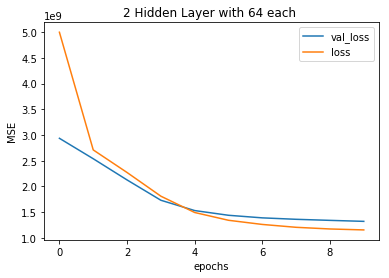

In [30]:
pd.DataFrame(hist.history).plot()
plt.title("2 Hidden Layer with 64 each ")
plt.xlabel("epochs")
plt.ylabel("MSE")

## Discussion on the number of nodes per hidden layer

### Similar to the number of layers , we could see that the neural network starts to over fit earlier as the number nodes per hidden layer goes up  . with 256 nodes in hidden layer, the model started overfitting at epoch  number 4 where as the first model overfits after 7th epoch 

# Number of Iterations

#### Here we will keep the model constant and see the variation as the number of iterations goes up 

In [31]:
# Train test spliting with test set of 20%
X_train, X_test, y_train , y_test = train_test_split(dataset.values,y, test_size=0.2, random_state=99)


Model = Sequential()

# Input Layer :
Model.add(Dense(128, input_dim = X_train.shape[1], activation='relu'))

# Hidden Layers :
Model.add(Dense(128, activation='relu'))
Model.add(Dense(256, activation='relu'))

# Output Layer :
Model.add(Dense(1,activation='linear'))

# Compile the network :
Model.compile(loss='mean_squared_error', optimizer='adam')
#Model.optimizer.lr.assign(value=0.001)
Model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 128)               27392     
_________________________________________________________________
dense_23 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_24 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 257       
Total params: 77,185
Trainable params: 77,185
Non-trainable params: 0
_________________________________________________________________


In [32]:
hist = Model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split = 0.1)

pred = Model.predict(X_train)

r2 = r2_score(y_true=y_train, y_pred=pred)
print('R2_score',r2)

print('AdjustedR2_score',adjusted_r2(y_train,pred,X_train))

Train on 4562 samples, validate on 507 samples
Epoch 1/100
4562/4562 [==============================] - 7s 2ms/step - loss: 4784648032.8558 - val_loss: 2917185217.8935
Epoch 2/100
4562/4562 [==============================] - 4s 906us/step - loss: 2623807847.2530 - val_loss: 2400516961.1992
Epoch 3/100
4562/4562 [==============================] - 4s 868us/step - loss: 2062109076.3139 - val_loss: 1878340130.4615
Epoch 4/100
4562/4562 [==============================] - 4s 886us/step - loss: 1587779833.2661 - val_loss: 1560886672.3471
Epoch 5/100
4562/4562 [==============================] - 4s 908us/step - loss: 1352014064.3157 - val_loss: 1441449458.3669
Epoch 6/100
4562/4562 [==============================] - 4s 888us/step - loss: 1245607870.0359 - val_loss: 1385093026.5878
Epoch 7/100
4562/4562 [==============================] - 4s 875us/step - loss: 1190974675.6686 - val_loss: 1346288499.1243
Epoch 8/100
4562/4562 [==============================] - 5s 1ms/step - loss: 1157573811.9071 -

4562/4562 [==============================] - 4s 880us/step - loss: 582838853.7378 - val_loss: 1429792290.6509
Epoch 68/100
4562/4562 [==============================] - 4s 924us/step - loss: 565757848.4805 - val_loss: 1400254318.4536
Epoch 69/100
4562/4562 [==============================] - 5s 1ms/step - loss: 553257899.5458 - val_loss: 1450434356.8284
Epoch 70/100
4562/4562 [==============================] - 5s 1ms/step - loss: 544250651.2722 - val_loss: 1412548021.0178
Epoch 71/100
4562/4562 [==============================] - 4s 863us/step - loss: 524965334.1096 - val_loss: 1416593492.9546
Epoch 72/100
4562/4562 [==============================] - 4s 900us/step - loss: 509052646.6076 - val_loss: 1464977652.0710
Epoch 73/100
4562/4562 [==============================] - 4s 920us/step - loss: 491655829.7484 - val_loss: 1416388619.6765
Epoch 74/100
4562/4562 [==============================] - 5s 997us/step - loss: 475024851.2477 - val_loss: 1471461069.6331
Epoch 75/100
4562/4562 [=========

KeyboardInterrupt: 

In [ ]:
pd.DataFrame(hist.history).plot()
plt.title("2 Hidden Layer with 128 & 256 nodes ")
plt.xlabel("epochs")
plt.ylabel("MSE")

### We ccan see that after around 10 epochs the model starts to over fit very badly. This phenomenon of neural netoworks necessitates the early stopping as soon as the validation loss goes up 

# Final model 

lets use the earlier model and use the optimum iteration of 10 to get the final model

In [ ]:
# Train test spliting with test set of 20%
X_train, X_test, y_train , y_test = train_test_split(dataset.values,y, test_size=0.2, random_state=99)


Model_f = Sequential()

# Input Layer :
Model_f.add(Dense(128, input_dim = X_train.shape[1], activation='relu'))

# Hidden Layers :
Model_f.add(Dense(128, activation='relu'))
Model_f.add(Dense(256, activation='relu'))

# Output Layer :
Model_f.add(Dense(1,activation='linear'))

# Compile the network :
Model_f.compile(loss='mean_squared_error', optimizer='adam')
#Model.optimizer.lr.assign(value=0.001)
Model_f.summary()


In [ ]:
hist = Model_f.fit(X_train, y_train, epochs=12, batch_size=32, validation_split = 0.1)

pred = Model_f.predict(X_train)

r2 = r2_score(y_true=y_train, y_pred=pred)
print('R2_score',r2)

print('AdjustedR2_score',adjusted_r2(y_train,pred,X_train))

In [ ]:
pd.DataFrame(hist.history).plot()
plt.title("2 Hidden Layer with 128 & 256 nodes ")
plt.xlabel("epochs")
plt.ylabel("MSE")

In [ ]:
pred = Model_f.predict(X_test)

r2 = r2_score(y_true=y_test, y_pred=pred)
print('R2_score',r2)


# Comparison and discussion

The final model looks good with the given data however, one could clearly see that the mean squared test error do not go beyond 1289419095. This error was similar for the final gradient boosting model . I am quite confident that we have managed to fit best possible models for the given feature set. In order to improve the model, we should go back to the drawing board and work on the feature selection and engineering part.  As our compute power is increasing and the packages such as Keras and PyTorch proliferates, Neural networks makes an interesting proposition and solid candidate as data science algorithm. For this particular dataset, I found Neural nets easier to train and tune compared to other models that were modeled in the assignment. Since my data set was one hot encoded, I did not find any difference in the performance of NN with or without scaling of the dataset.I would uphold that as one of the pros of NN for this particular dataset